# Logistic Regression

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [66]:
def sigmoidFunc(x):
    z = 1 / (1+np.exp(-x))
    return z

逻辑回归-交叉熵损失函数

In [ ]:
def costFunction(theta,X,y):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    cost = np.multiply(-y,np.log(sigmoidFunc(X*theta.T)))-np.multiply((1-y),np.log(1-sigmoidFunc(X * theta.T)))
    return np.sum(cost)/len(X)

逻辑回归-交叉熵带正则化项的损失函数

In [ ]:
def gradientDescent(theta,X,y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])

    grad = np.zeros(parameters)
    
    error = sigmoidFunc(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

In [ ]:
path1 = 'ex2data1.txt'
data1 = pd.read_csv(path1, header = None , names = ['Feature1', 'Feature2', 'Admitted'])
data1.head()

In [ ]:
data1.insert(0,'Ones',1)
data1.head()

In [ ]:
positive = data1[data1['Admitted'].isin([1])]
negative = data1[data1['Admitted'].isin([0])]

fig,ax = plt.subplots(figsize = (12,8))
ax.scatter(positive['Feature1'],positive['Feature2'],s=50,c='b',marker = 'o',label = 'Admitted')
ax.scatter(negative['Feature1'],negative['Feature2'],s=50,c='r',marker = 'x',label = 'Not Admitted')
ax.legend()
ax.set_xlabel('Feature_1')
ax.set_ylabel('Feature_2')
plt.show()

In [ ]:
gradientDescent(theta,X,y)

In [ ]:
cols = data1.shape[1]
x = data1.iloc[:,0:cols-1]
y = data1.iloc[:,cols-1:cols]

input_x = np.array(x.values)
input_y = np.array(y.values)
theta = np.zeros(3)


In [ ]:
cost = costFunction(theta,input_x,input_y)
cost

In [ ]:
result = opt.fmin_tnc(func = costFunction, x0 = theta, fprime = gradientDescent, args = (input_x,input_y))
result

In [ ]:
costFunction(result[0],x,y)

In [67]:
def predict(theta,X):
    probability = sigmoidFunc(X * theta.T)
    return [1 if x > 0.5 else 0 for x in probability]

In [ ]:
theta_gd = np.matrix(result[0])
predictions = predict(theta_gd,input_x)
correct = [1 if (a == b) else 0 for (a,b) in zip(predictions,input_y)]
accuracy = (sum(map(int,correct))/len(correct))
print ('accuracy = {}%'.format(accuracy*100))

In [79]:
def costFunctionReg(theta,X,y,lamb):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)

    cost = np.multiply(-y,np.log(sigmoidFunc(X * theta.T)))-np.multiply(1-y,np.log(1 - sigmoidFunc(X * theta.T)))

    reg_cost = lamb/(len(X) * 2) * (np.sum(np.power(theta[:,1:theta.shape[1]], 2,)))

    return np.sum(cost)/len(X) + reg_cost

In [77]:
def regGradientDescent(theta,X,y,lamb):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])

    grad = np.zeros(parameters)

    error = sigmoidFunc(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error,X[:,i])

        if i == 0 :
            grad[i] = np.sum(term)/len(X)
        else:
            grad[i] = np.sum(term)/len(X) + lamb / len(X) * theta[:,i]
    return grad

In [70]:
path = 'ex2data2.txt'
data2 = pd.read_csv(path, header = None,names = ['Feature1','Feature2','Admitted'])
data2.head()

,Feature1,Feature2,Admitted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


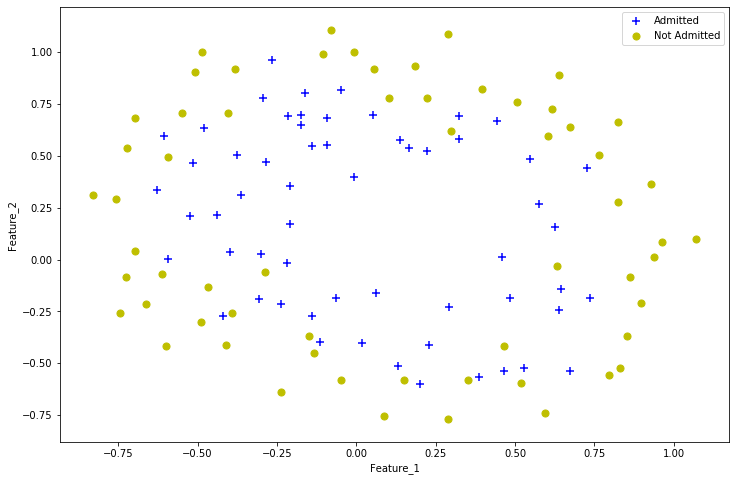

In [71]:
positive = data2[data2['Admitted'].isin([1])]
negative = data2[data2['Admitted'].isin([0])]

fig,ax = plt.subplots(figsize = (12,8))
ax.scatter(positive['Feature1'],positive['Feature2'],s=50,c='b',marker = '+',label = 'Admitted')
ax.scatter(negative['Feature1'],negative['Feature2'],s=50,c='y',marker = 'o',label = 'Not Admitted')
ax.legend()
ax.set_xlabel('Feature_1')
ax.set_ylabel('Feature_2')
plt.show()

In [72]:
degree = 7
x1 = data2['Feature1']
x2 = data2['Feature2']
data2.insert(3,'Ones',1)

for i in range(1,degree):
    for j in range(0,i+1):
        data2['F'+str(i-j)+str(j)] = np.power(x1,i-j) * np.power(x2,j)

data2.drop('Feature1', axis = 1, inplace = True)
data2.drop('Feature2', axis = 1, inplace = True)

data2.head()


,Admitted,Ones,F10,F01,F20,F11,F02,F30,F21,F12,...,F23,F14,F05,F60,F51,F42,F33,F24,F15,F06
0,1,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [73]:
cols = data2.shape[1]
y = data2.iloc[:,0:1]
X = data2.iloc[:,1:cols]

y_2 = np.array(y.values)
X_2 = np.array(X.values)
theta2 = np.zeros(cols-1)

lamb = 1

In [74]:
costFunctionReg(X_2,y_2,theta2,lamb)

0.6931471805599454

In [75]:
regGradientDescent(lamb,theta2,X_2,y_2)

array([8.47457627e-03, 1.87880932e-02, 7.77711864e-05, 5.03446395e-02,
       1.15013308e-02, 3.76648474e-02, 1.83559872e-02, 7.32393391e-03,
       8.19244468e-03, 2.34764889e-02, 3.93486234e-02, 2.23923907e-03,
       1.28600503e-02, 3.09593720e-03, 3.93028171e-02, 1.99707467e-02,
       4.32983232e-03, 3.38643902e-03, 5.83822078e-03, 4.47629067e-03,
       3.10079849e-02, 3.10312442e-02, 1.09740238e-03, 6.31570797e-03,
       4.08503006e-04, 7.26504316e-03, 1.37646175e-03, 3.87936363e-02])

In [80]:
result = opt.fmin_tnc(func = costFunctionReg, x0 = theta2, fprime = regGradientDescent,args=(X_2,y_2,lamb))
result

(array([ 1.27271026,  0.62529964,  1.18111686, -2.01987399, -0.91743189,
        -1.43166928,  0.12393227, -0.36553118, -0.35725404, -0.17516291,
        -1.45817009, -0.05098418, -0.61558554, -0.27469165, -1.19271298,
        -0.24217841, -0.20603299, -0.04466178, -0.27778951, -0.29539514,
        -0.45645982, -1.04319155,  0.02779373, -0.2924487 ,  0.0155576 ,
        -0.32742405, -0.1438915 , -0.92467487]), 32, 1)

In [ ]:
theta_min = np.matrix(result2[0])
predictions = predict(theta_min, X2)
correct = [1 if (a == b ) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))